# Exploratory Data Analysis on Wine Quality

The scope of this analysis is to understand relationship of various parameters which impact the quality ratings for both Red and White wine.The data set utilized for the analysis is downloaded from UCI repository https://archive.ics.uci.edu/ml/datasets/Wine+Quality and consists of 6000+ sample data for combined Red and White wine types. 


##  Data Description

**Fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

**Volatile acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

**Citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines

**Residual sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

**Chlorides:** the amount of salt in the wine

**Free sulfur dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

**Total sulfur dioxide:** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

**Density:** the density of water is close to that of water depending on the percent alcohol and sugar content

**pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**Sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

**Alcohol:** the percent alcohol content of the wine

**Quality:** the quality is a rate from 0 to 10 which is given to the wines by assessors, and type denotes whether the wine is red or white.


## Read and Clean raw data 

First we will read data two data tables with read.csv

In [1]:
red <- read.csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', header = TRUE, sep = ';')
white <- read.csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', header = TRUE, sep = ';')

##  Task 1:
* What is the dimension of data set i.e. how many records and how many variables does exist? 
* What is the name of variables? 
* What is the attribute of each variable?

In [2]:
dim(red) # 1599

[1] 1599   12

In [3]:
head(red)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [4]:
dim(white) # 4898

[1] 4898   12

In [5]:
head(white)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [ ]:
dim(white)[1] + dim(red)[1] # 6497 records

**There are 6497 records of wine evaluation, and 12 variables are in the data set. Two datasets have the same variable names.**


We will first append two datasets together to create the master dataset for further analysis. A factor variable "type" is introduced as the indicator of wine type.

In [6]:
# We want 'type' to be 'Red' & 'White' ('red' & 'white', to match redwhitewine.csv)
red[, 'type'] <- 'Red'
white[, 'type'] <- 'White'
# Combine the two datasets and change type to a factor variable
wine <- rbind(red, white) # and join
wine$type <- as.factor(wine$type) 

### <font color='blue'>Additional information: differences between different data binding methods </font> 


![](http://media.wiley.com/Lux/72/326772.image0.jpg)

In [7]:
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


Some names were too long, so we use some of common abbreviation:

RS - residual sugar <br>
ABV - percentage of alcohol <br>
SO2 - sulfur.dioxide 


In [8]:
names(wine)[c(4,6,7,11)]<-c("RS","free.SO2", "total.SO2","ABV")
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,RS,chlorides,free.SO2,total.SO2,density,pH,sulphates,ABV,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


In [ ]:
write.csv(wine, "Wine.csv",row.names=FALSE)

Here is the cleaned data, we will save the master data to a csv file for easy access later.

Now we will first check data type. 

In [ ]:
str(wine)

Only one variable is factor variable, all other variables are numaric variables. 

## Task 2:
Find the descriptive statistics of variables. Describe the interesting observations.

In [9]:
summary(wine)

 fixed.acidity    volatile.acidity  citric.acid           RS        
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides          free.SO2        total.SO2        density      
 Min.   :0.00900   Min.   :  1.00   Min.   :  6.0   Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00   1st Qu.: 77.0   1st Qu.:0.9923  
 Median :0.04700   Median : 29.00   Median :118.0   Median :0.9949  
 Mean   :0.05603   Mean   : 30.53   Mean   :115.7   Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00   3rd Qu.:156.0   3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00   Max.   :440.0   Max.   :1.0390  
       pH          sulphates      

If you need advanced descriptive statistics, you can use describe from the psych library.

In [10]:
library(psych)
round(describe(wine), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed.acidity,1,6497,7.215,1.296,7.000,7.056,0.890,3.800,15.900,12.100,1.722,5.054,0.016
volatile.acidity,2,6497,0.340,0.165,0.290,0.316,0.119,0.080,1.580,1.500,1.494,2.820,0.002
citric.acid,3,6497,0.319,0.145,0.310,0.318,0.104,0.000,1.660,1.660,0.472,2.393,0.002
RS,4,6497,5.443,4.758,3.000,4.703,2.520,0.600,65.800,65.200,1.435,4.353,0.059
chlorides,5,6497,0.056,0.035,0.047,0.051,0.016,0.009,0.611,0.602,5.397,50.841,0.000
free.SO2,6,6497,30.525,17.749,29.000,29.320,17.791,1.000,289.000,288.000,1.220,7.896,0.220
total.SO2,7,6497,115.745,56.522,118.000,115.923,57.821,6.000,440.000,434.000,-0.001,-0.373,0.701
density,8,6497,0.995,0.003,0.995,0.995,0.003,0.987,1.039,0.052,0.503,6.597,0.000
pH,9,6497,3.219,0.161,3.210,3.213,0.163,2.720,4.010,1.290,0.387,0.365,0.002


Some observations from the Summary:

* There is a big range for sulfur dioxide (SO2, both free and total) across the samples.
* citric acid min is 0, is this actually 0, too low to register, or missing data? 
* The alcohol content varies quite a bit from 8.00 to 14.90
* The quality of the samples range from 3 (yuck) to 9
* The range for fixed acidity is quite high with minimum being 3.8 and maximum being 15.9
* pH value varies from 2.720 to 4.010, seem quite low, given that pH 7 is neutral, 4 is acidic? 
* density has an extremely small range


We can compare the standard deviation for variables 

In [11]:
sort(apply(wine[-13], 2, sd))

density        chlorides      citric.acid        sulphates 
     0.002998673      0.035033601      0.145317865      0.148805874 
              pH volatile.acidity          quality              ABV 
     0.160787202      0.164636474      0.873255272      1.192711749 
   fixed.acidity               RS         free.SO2        total.SO2 
     1.296433758      4.757803743     17.749399772     56.521854523

The lowest standard deviation is for "density" variable, and "total SO2" has the highest standard deviation.

### <font color='blue'>Additional information: what is apply doing?</font> 

Tutorial on apply function can be found, for example, https://www.datacamp.com/community/tutorials/r-tutorial-apply-family

## Task 3
Generate a boxplot for all variables, boxplots for variables two by two, and separate boxplots for each variable.

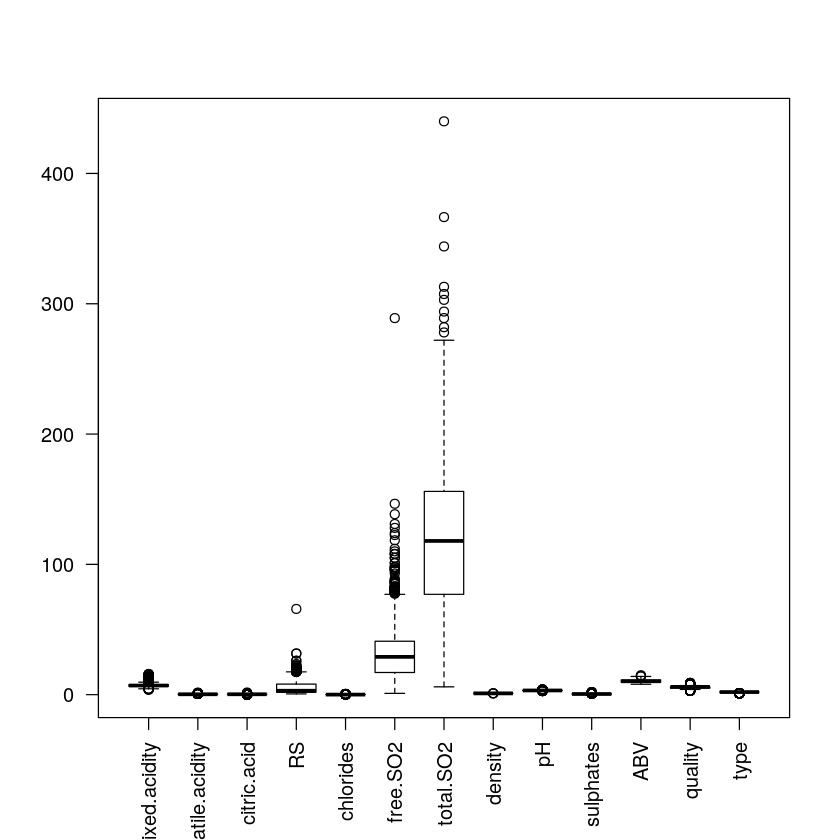

In [12]:
boxplot(wine, las=2, cex.axis = 1)

<font color='blue'>Additional information:  What is boxplot ?</font> 


![](http://www.comfsm.fm/~dleeling/statistics/boxplot-explained.png)

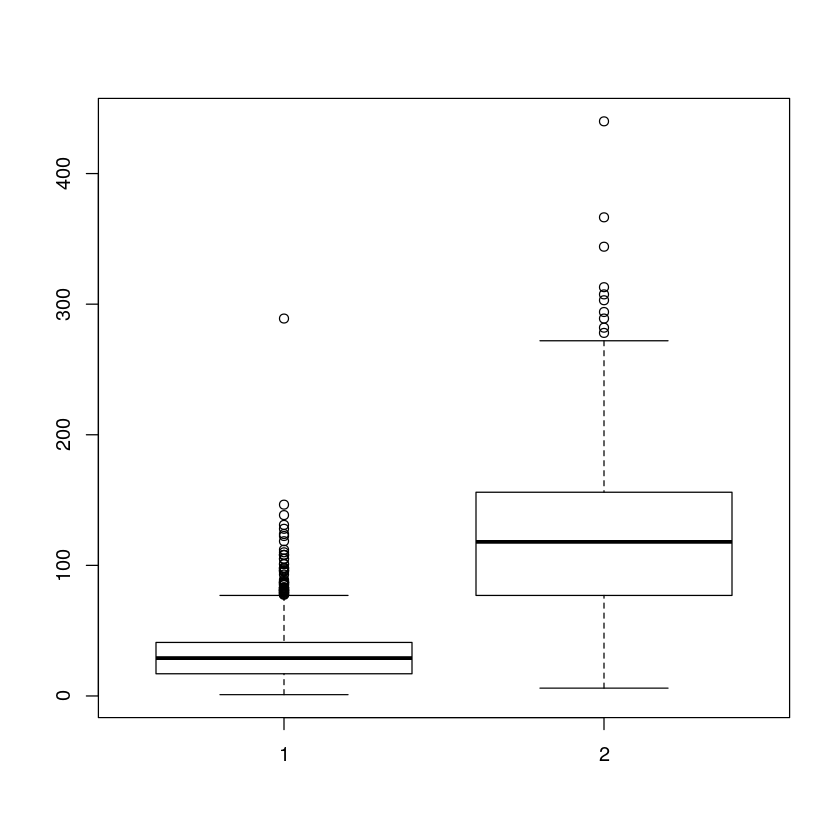

In [13]:
# The bigger problem is the scale, most attributes are overshadowed by the biggest (the SO2)
# You can specify the ones you want:
boxplot(wine$free.SO2, wine$total.SO2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


No id variables; using all as measure variables



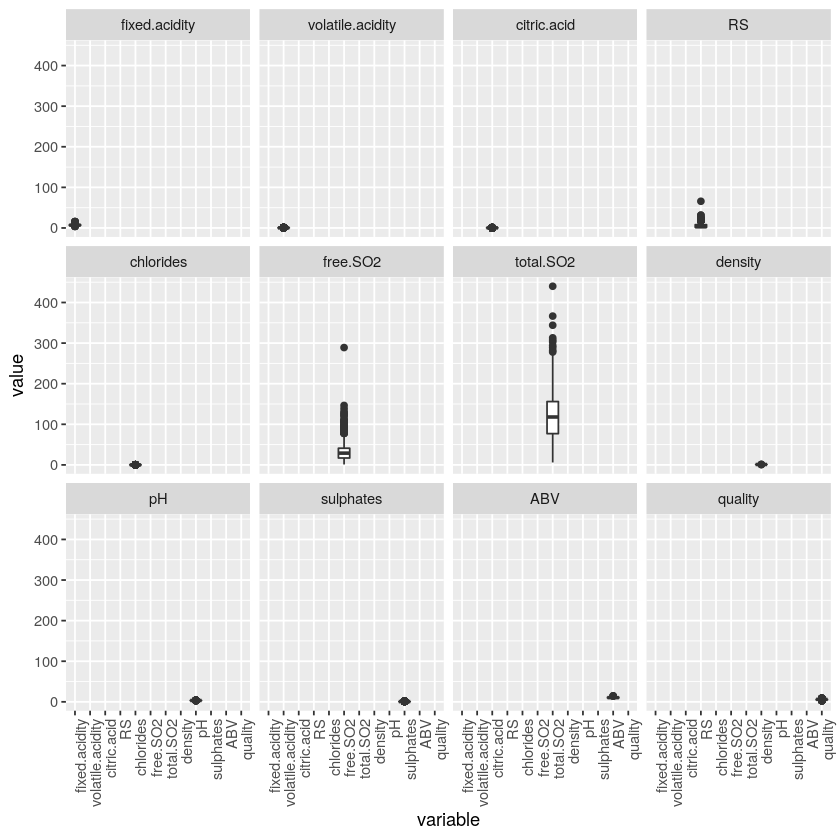

In [14]:
# ggplot will give you a slightly prettier mess
library(ggplot2)
library(reshape2)
m1 <- melt(as.data.frame(wine[,-13]))
ggplot(m1,aes(x = variable,y = value)) + 
  facet_wrap(~variable) + 
  geom_boxplot()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
                      

The lowest standard deviation is for "density" variable, and "total SO2" has the highest standard deviation.

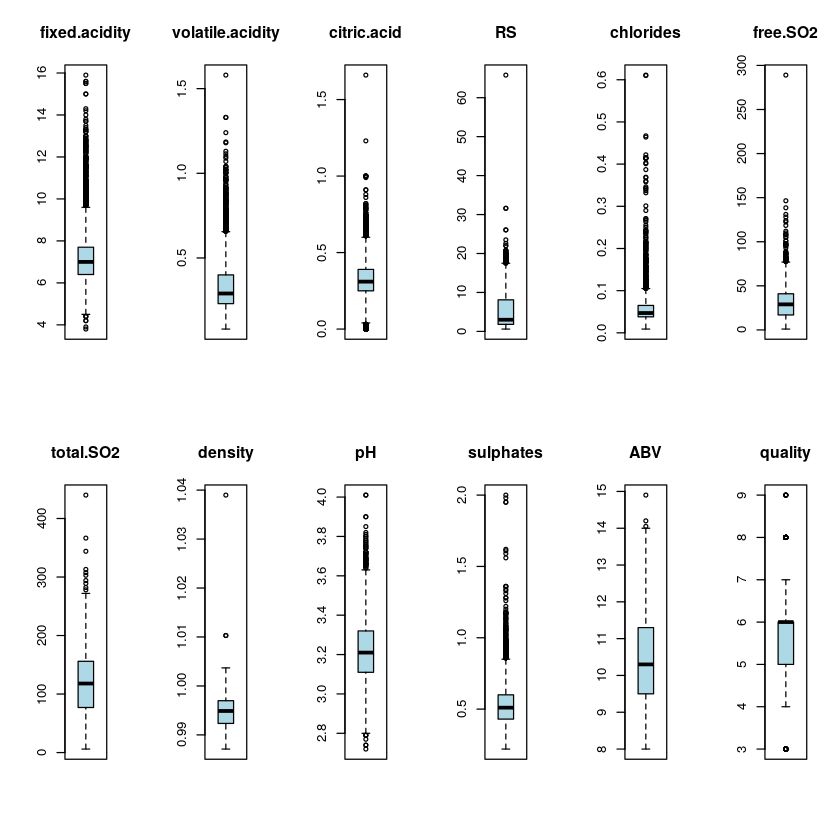

In [15]:
# or you can plot them all in a loop, notice the different scales now
par(mfrow = c(2,6)) # 6 x 2 grid
for (i in 1:(length(wine) - 1)) {
        boxplot(wine[,i], main = names(wine[i]), type="l", col = 'lightblue') # I like blue
}

## Task 4: Check correlation
Investigate the associations between variables. Calculate the correlation between variables.

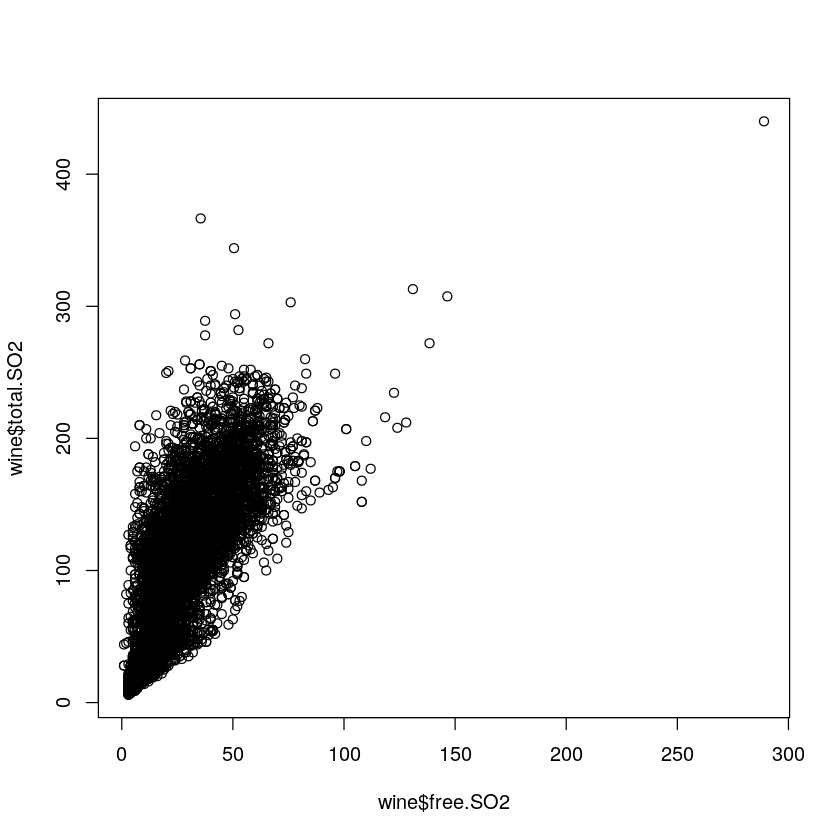

In [16]:
plot(wine$free.SO2, wine$total.SO2)

Scatterplots are usefull to examine in bivariate data such as linearity, slope, and strength.


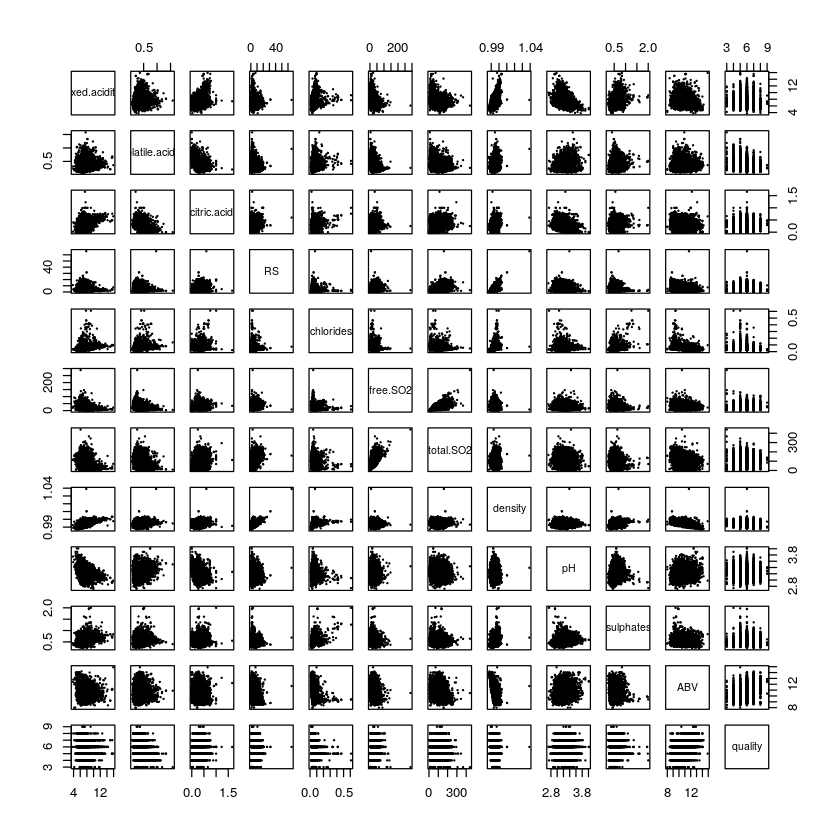

In [17]:
pairs(wine[1:12],cex=0.2)

In [18]:
my_fit

,fixed.acidity,volatile.acidity,citric.acid,RS,chlorides,free.SO2,total.SO2,density,pH,sulphates,ABV,quality
fixed.acidity,1.000,0.219,0.324,-0.112,0.298,-0.283,-0.329,0.459,-0.253,0.300,-0.095,-0.077
volatile.acidity,0.219,1.000,-0.378,-0.196,0.377,-0.353,-0.414,0.271,0.261,0.226,-0.038,-0.266
citric.acid,0.324,-0.378,1.000,0.142,0.039,0.133,0.195,0.096,-0.330,0.056,-0.010,0.086
RS,-0.112,-0.196,0.142,1.000,-0.129,0.403,0.495,0.553,-0.267,-0.186,-0.359,-0.037
chlorides,0.298,0.377,0.039,-0.129,1.000,-0.195,-0.280,0.363,0.045,0.396,-0.257,-0.201
free.SO2,-0.283,-0.353,0.133,0.403,-0.195,1.000,0.721,0.026,-0.146,-0.188,-0.180,0.055
total.SO2,-0.329,-0.414,0.195,0.495,-0.280,0.721,1.000,0.032,-0.238,-0.276,-0.266,-0.041
density,0.459,0.271,0.096,0.553,0.363,0.026,0.032,1.000,0.012,0.259,-0.687,-0.306
pH,-0.253,0.261,-0.330,-0.267,0.045,-0.146,-0.238,0.012,1.000,0.192,0.121,0.020
sulphates,0.300,0.226,0.056,-0.186,0.396,-0.188,-0.276,0.259,0.192,1.000,-0.003,0.038


###  <font color='blue'>Additional information: What is correlation coefficient? </font> 

![](http://www.resacorp.com/images/slrund031.gif)

Strong correlation?

![](http://www.uow.edu.au/content/groups/public/@web/@stsv/documents/mm/uow153493.gif)

In [19]:
library("car") # another matrix type plot

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit




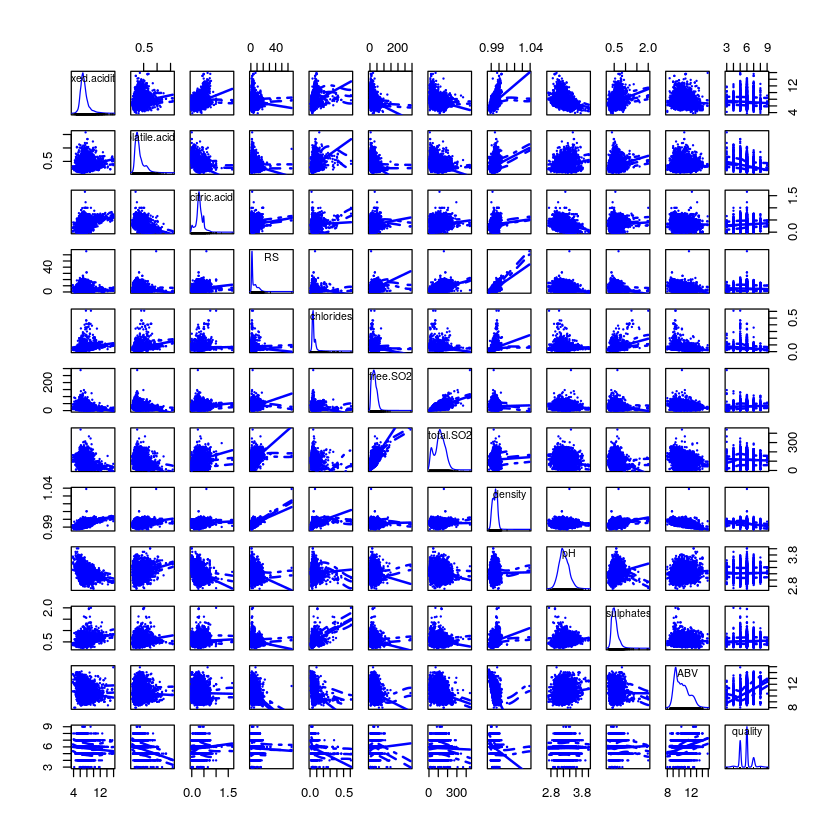

In [20]:
scatterplotMatrix(wine[1:12],cex=0.2) # ignore type

## Task 5
Find the distribution of variables, and describe the shape of the distribution.

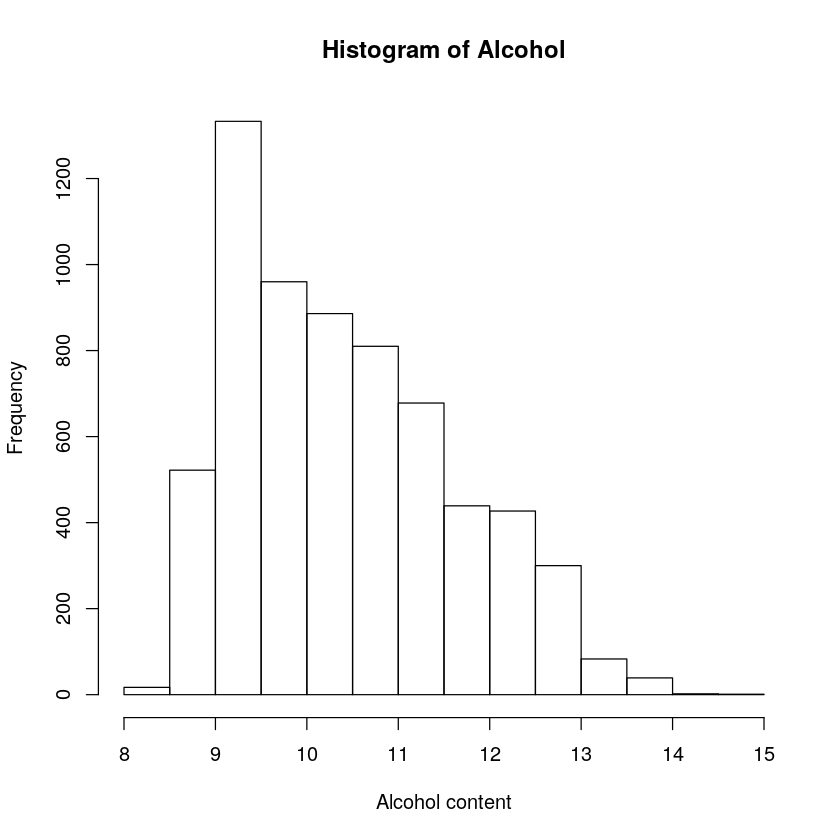

In [21]:
hist(wine$ABV, xlab="Alcohol content", main="Histogram of Alcohol")

The distribution of alcohol data is skewed to the right.

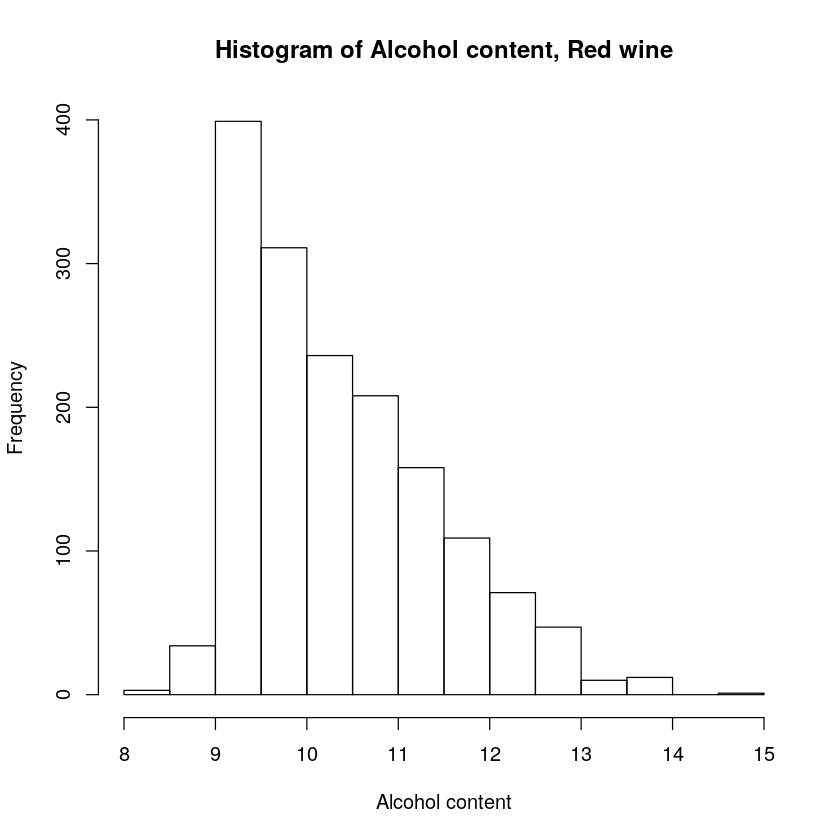

In [22]:
hist(wine$ABV[wine$type=="Red"], xlab="Alcohol content", main="Histogram of Alcohol content, Red wine")

The distribution of alcohol content data for red wine is skewed to the right. 

Alternatively we can use ggplot. 

Lets compare four indicators for red wine and wihte wine separately. 

In [23]:
library(gridExtra) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



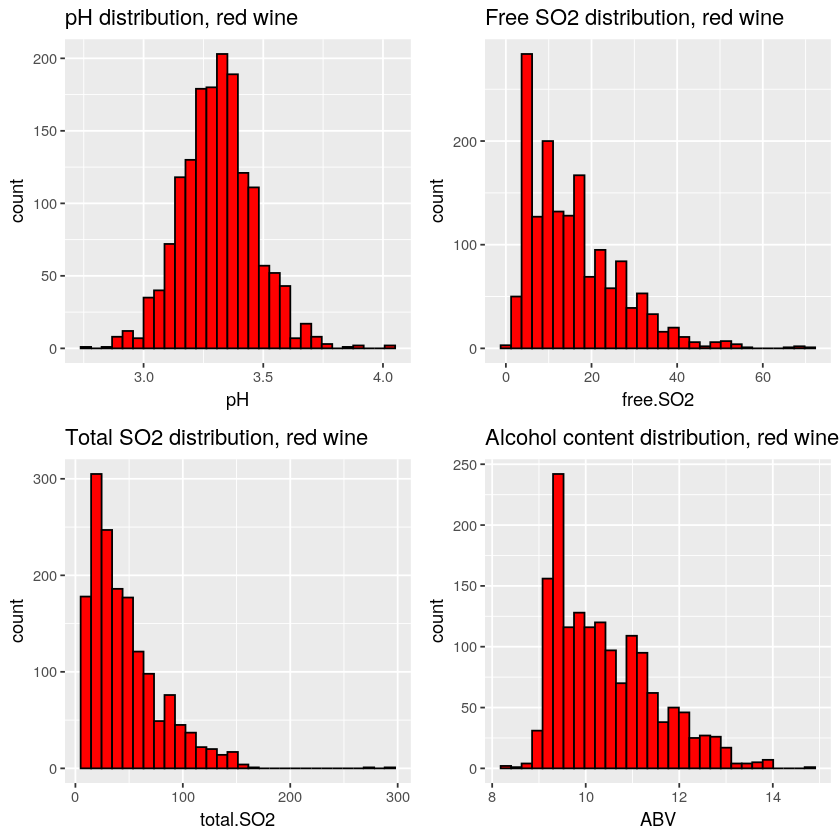

In [24]:
p1<-ggplot(aes(x=pH), data =  subset(wine, type %in% c("Red"))) +
    geom_histogram(color = I('black'), fill = "red") + 
    ggtitle('pH distribution, red wine')

p2<-ggplot(aes(x=free.SO2), data =  subset(wine,type %in% c("Red"))) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Free SO2 distribution, red wine')

p3<-ggplot(aes(x=total.SO2), data =  subset(wine,type %in% c("Red"))) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Total SO2 distribution, red wine')

p4<-ggplot(aes(x=ABV), data =  subset(wine,type %in% c("Red"))) +
    geom_histogram(color = I('black'), fill = "red") +
    ggtitle('Alcohol content distribution, red wine')
# plot all 4, 2 x 2 

grid.arrange(p1, p2, p3, p4, ncol = 2)

The following observations are obtained from the above plot

* The pH value seems to dispaly a normal distribution with major samples exhibiting values between 3.0 and 3.5, the others are skewed to the left
* The alcohol content seems to vary from 8 to 14 with major peaks around 9 with a lower count between 13 and 14.

A similar distributon analysis for white wine is given below
    

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



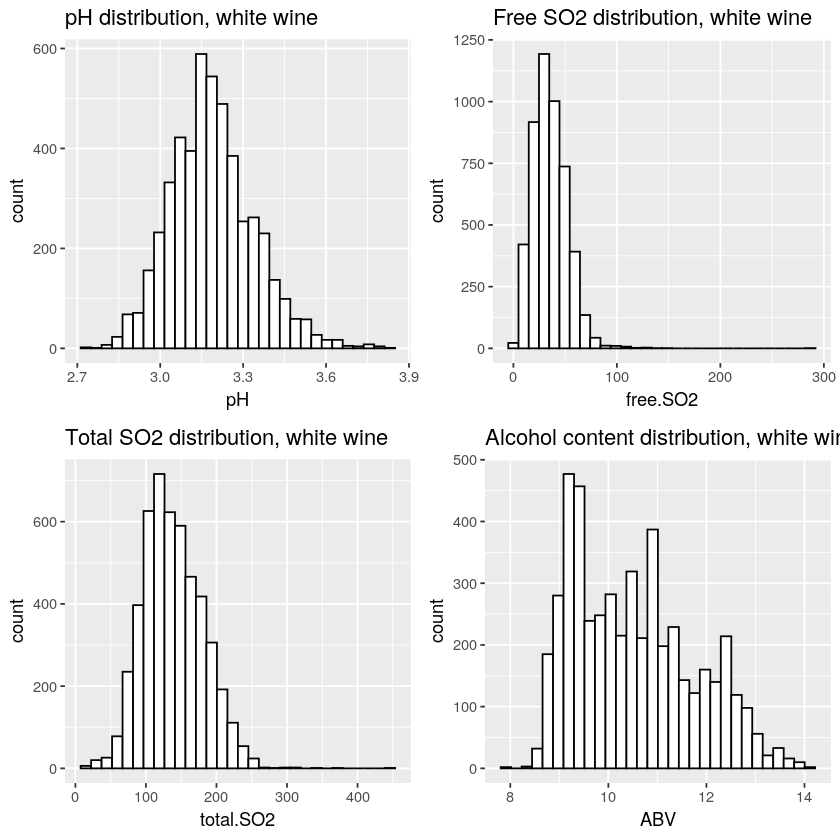

In [25]:
q1<-ggplot(aes(x=pH), data =  subset(wine,type %in% c("White")))+
    geom_histogram(color =I('black'),fill = "White")+
    ggtitle('pH distribution, white wine')

q2<-ggplot(aes(x=free.SO2), data =  subset(wine,type %in% c("White")))+
    geom_histogram(color =I('black'),fill = "white")+
    ggtitle('Free SO2 distribution, white wine')

q3<-ggplot(aes(x=total.SO2), data =  subset(wine,type %in% c("White")))+
    geom_histogram(color =I('black'),fill = "white")+
    ggtitle('Total SO2 distribution, white wine')

q4<-ggplot(aes(x=ABV), data =  subset(wine,type %in% c("White")))+
    geom_histogram(color =I('black'),fill = "white")+
    ggtitle('Alcohol content distribution, white wine')

grid.arrange(q1,q2,q3,q4,ncol=2)

Some observations from the plot are as below:

* In this case the pH value exhibits a distribution that is closed to a normal distribution, but so does total SO2, the alcohol 'shape' is similar to that for red wine

The spread of the quality analysis for the Red and White types are given as below

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



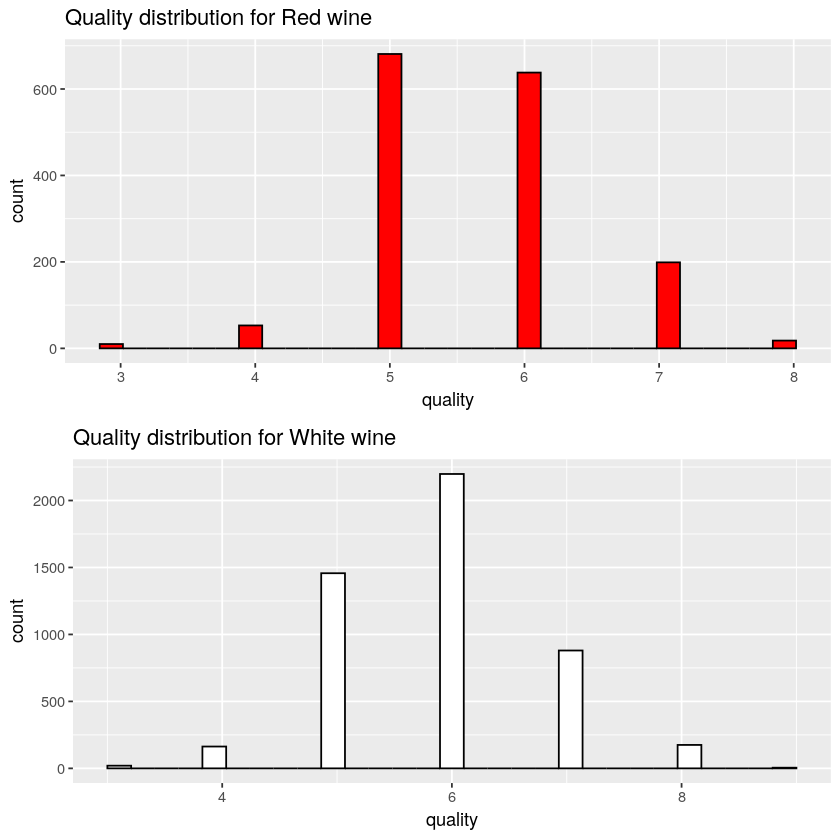

In [26]:
r1<-ggplot(aes(x=quality), data =  subset(wine,type %in% c("Red")))+
    geom_histogram(color =I('black'),fill = "red")+
    ggtitle('Quality distribution for Red wine')

r2<-ggplot(aes(x=quality), data =  subset(wine,type %in% c("White")))+
    geom_histogram(color =I('black'),fill = "white")+
    ggtitle('Quality distribution for White wine')

grid.arrange(r1, r2, ncol = 1)

# Correlation plots
as below, installing and loading GGally fails, could be an R version issue, not all libraries work all the time. 

There are alternatives:

* library(corrgram)
* library(corrplot)

#### but in this case none of them worked... (they may work for you)
Below is an example of what was produced by GGally:

<img src = "GGally.png">

from http://rstudio-pubs-static.s3.amazonaws.com/24803_abbae17a5e154b259f6f9225da6dade0.html

A mashup of scatter, correlations and boxplot, a bit messy, there are alternatives.. DIY

In [34]:
library(GGally) 
# GGally install:
# install.packages('GGally', repos = c('http://cran.ms.unimelb.edu.au'))

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [36]:
# may need to update R
# there are alternatives: 
# Correlogram Example
# install.packages('corrplot', repos = c('http://cran.ms.unimelb.edu.au'))
# library(corrplot)
# install.packages('corrgram', repos = c('http://cran.ms.unimelb.edu.au'))
# library(corrgram)
# both failed, DIY

In [35]:
# DIY correlation plot
# http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix
# there's some truth to the quote that modern programming is often stitching together pieces from SO 

colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    ## trick: "don't create a new plot" thing by following the
    ## advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
    ## This allows
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

# usage e.g.:
# pairs(mtcars, upper.panel = panel.cor)

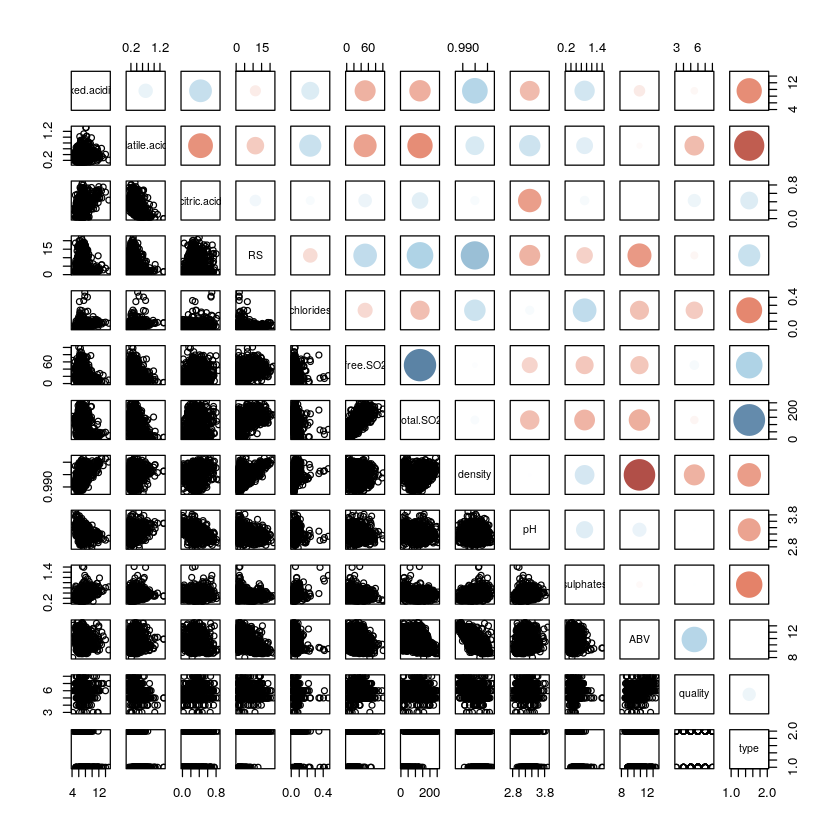

In [37]:
pairs(wine[sample.int(nrow(wine),1000),], upper.panel=panel.cor)

Nice, blue indicates positive correlation, red indicates negative correlation.


#### What does the absence of a circle (red or blue) indicate?
#### What shape is the corresponding scatter likely to be?


Now look at the blue (positive) and red (negative) correlations. e.g. 'freeSO2' and 'totalSO2' (on the plot diagonal). To the right of 'freeSO2' is a large blue circle representing a positive (+ve) correlation with total SO2 (more SO2 = more SO2?) the corresponding scatter plot is below 'freeSO2', it's a left to right upwards trend. Conversely, note density vs alcohol, a large red circle (3 squares to the right of density), the corresponding scatter is diametrically opposite (3 squares below density), a right to left upwards trend.

Observations from the plot:


* As suspected, free SO2 and total SO2 are highly correlated with each other (correlation coefficient 0.72) and negatively correlated with acidity.

* pH is negatively correlated with fixed acidity, citric acid, total SO2 and residual sugar. The negative correlation with the residual sugar makes sense, since sugar has not yet oxidized into acids. Moreover, pH is positively correlated with the volatile acidity, which is a bit counter-intuitive.

* Residual sugar and density are also positively correlated, which we guess makes sense, adding sugar ought to increase the density!

* According to description, sulphates are added to produce SO2 which acts as antimicrobial and antioxidant; total SO2 is also added for the same purpose, but why then they are negatively correlated, perhaps one is converted into another.

* It is surprising to see positive correlation between total SO2 and residual sugar, maybe more SO2 is added to prevent sugar from being converted, and thus make sure that wine tastes a bit sugary.

* It is nice to see volatile acidity is negatively correlated with SO2, as SO2 is added in the wine to prevent acetic acid formation.

* Wine quality is highly correlated with alcohol quantity and density . However, alcohol and density are negatively correlated (correlation coefficient: -0.69). Therefore, there might be collinearity problem. It’s the alcohol amount that reduces the density, due to chemistry, hence alcohol amount is a good choice as a wine quality predictor. 

* Wine quality is negatively correlated with the volatile acidity, as too high levels of it leads to vinegary taste, supporting the description about the data set.

https://en.wikipedia.org/wiki/Wine_fault#Sulfur_compounds


#### Should red & white wine be analysed together?


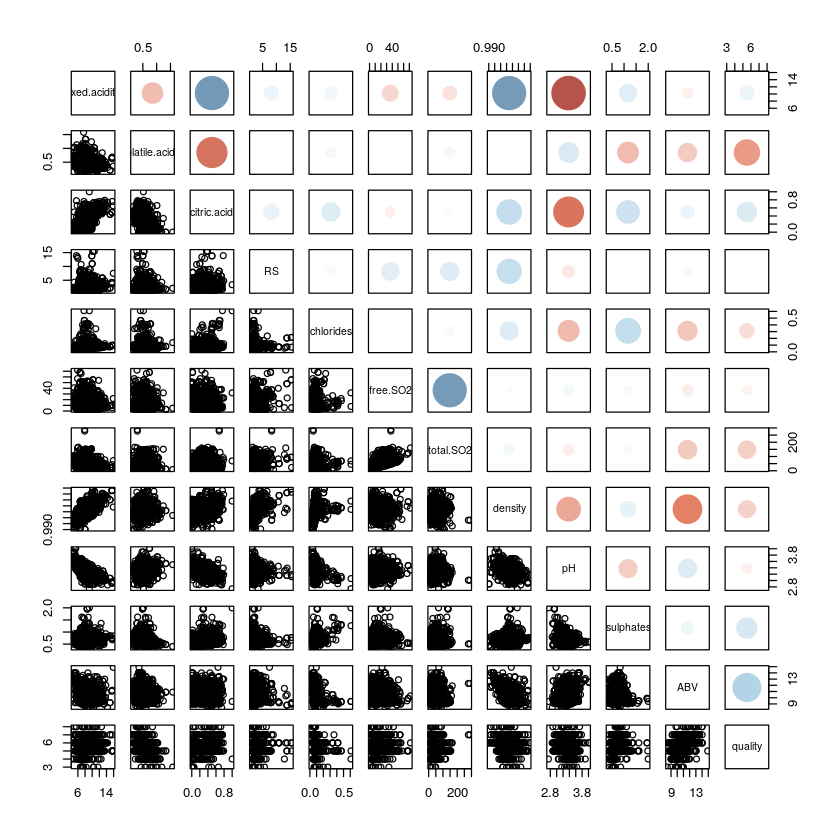

In [38]:
pairs(wine[wine$type=="Red",-13], upper.panel = panel.cor) # just red

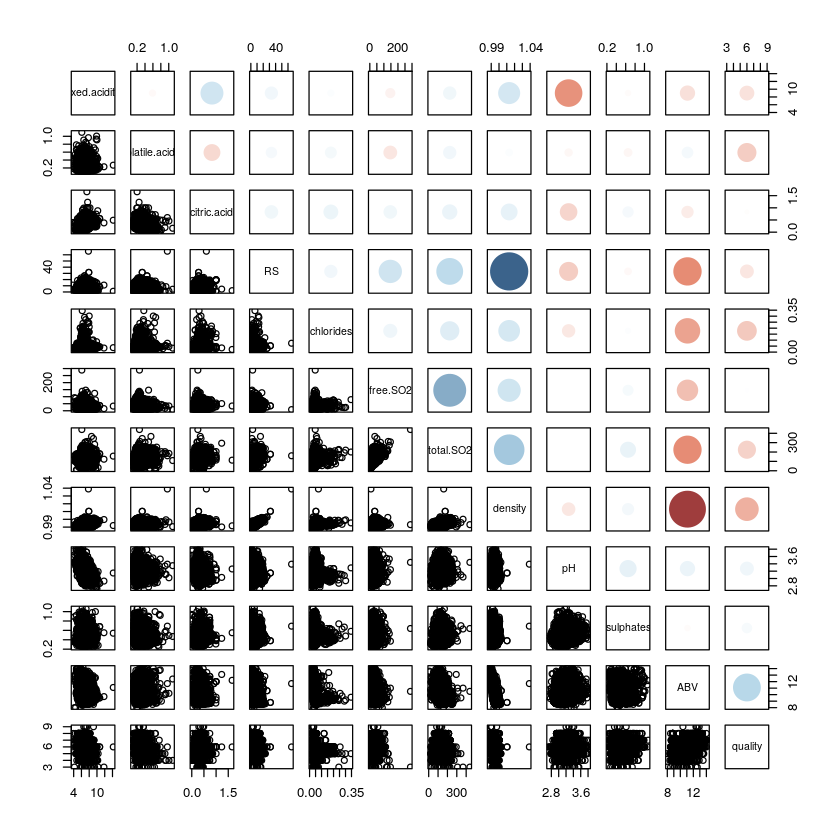

In [39]:
pairs(wine[wine$type=="White",-13], upper.panel = panel.cor) # just white

Are the correlation matrix the same ?


Let's have a look at red and white wine separately. 

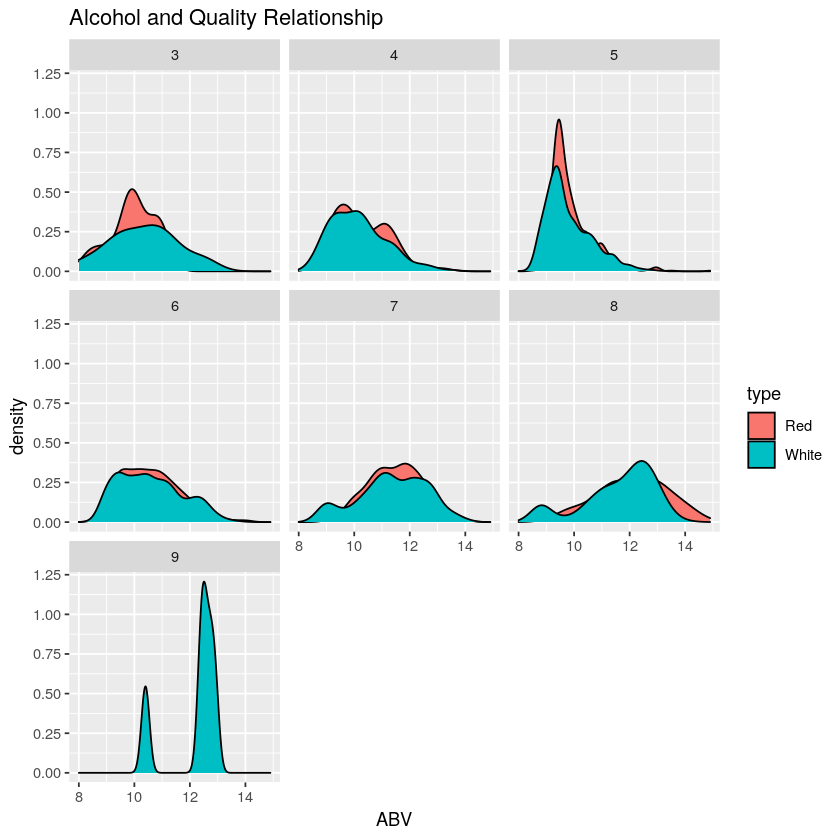

In [27]:
ggplot(aes(x=ABV),data =wine) + 
    geom_density(aes(fill = type)) +
    facet_wrap(~quality) +
    ggtitle('Alcohol and Quality Relationship')

There seems to be no significant bias of the alcohol content even though there are samples with higher alcohol 
content for red wine exhibiting a higher density reading for the quality levels of 3 and 5 as compared to white wine.
From our earlier scatterplot matrices, alcohol seems to exhibit a strong correlation with pH value.

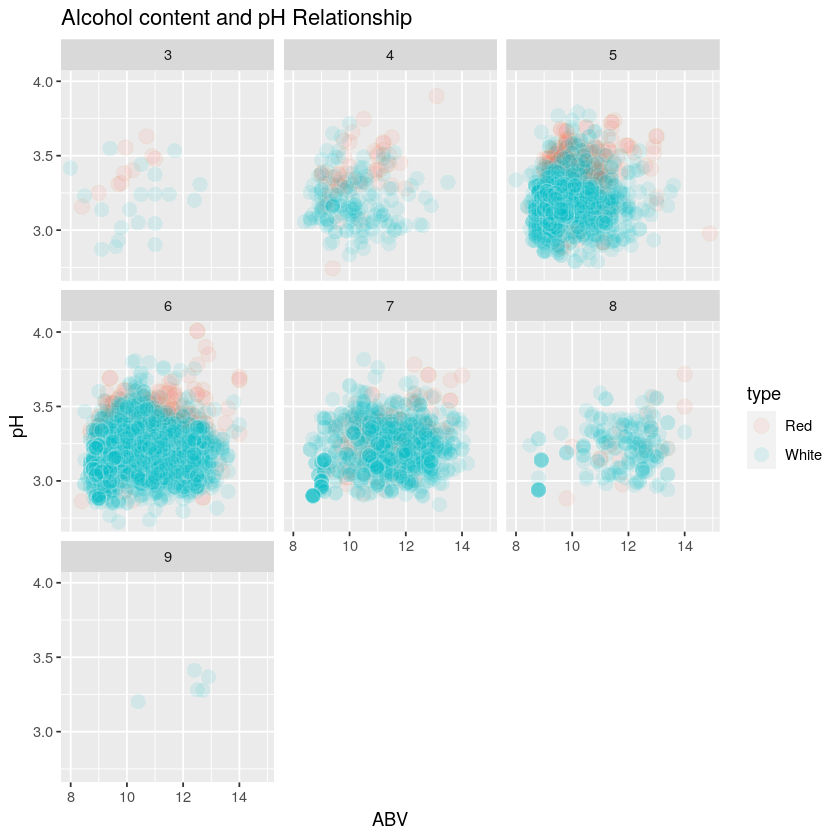

In [28]:
ggplot(aes(x=ABV, y=pH),data = wine) + 
    geom_jitter(aes(color = type, bg = type), alpha=1/10,,pch=21, cex=4) +
    facet_wrap(~quality) +
    scale_color_brewer(type = 'div') +
    ggtitle('Alcohol content and pH Relationship')

As expected, there seems to a dip in density while the Alcohol content increases,
and the white wine exhibits a more prominent dip.

The negative correlation of Alcohol with Total and Free SO2 and Chlorides are analysed as below:

Warning message:
“Ignoring unknown parameters: fun.y”
Warning message:
“Ignoring unknown parameters: fun.y”
Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



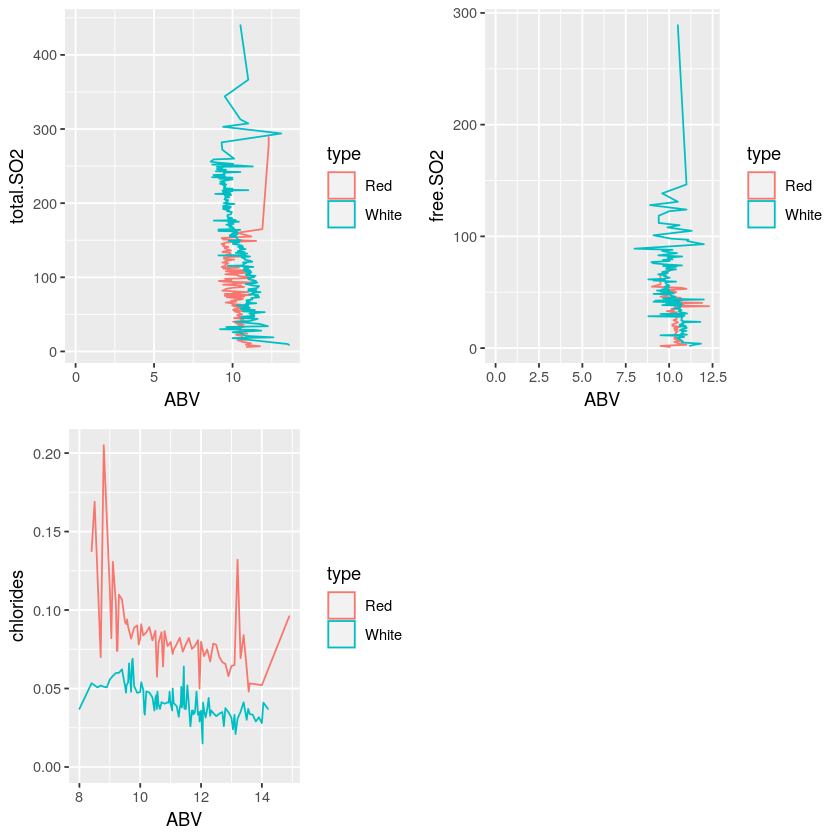

In [29]:
a1<-ggplot(aes(x=ABV,y=total.SO2), data = wine) +
    geom_density(aes(color=type),stat='summary',fun.y=median)
 
a2<-ggplot(aes(x=ABV,y=free.SO2), data = wine) +
    geom_density(aes(color=type),stat='summary',fun.y=median)
  
a3<-ggplot(aes(x=ABV,y=chlorides), data = wine) +
    geom_density(aes(color=type),stat='summary',fun.y=median)

grid.arrange(a1,a2,a3,ncol=2)

The observations from the above analysis are as follows:

* Total SO2: 
White wine exhibits higher Total SO2 contents than Red wine across all Alcohol levels. 
Total SO2 content decreases with Alcohol content for White wine

* Free SO2: 
Again White wine exhibits higher Free SO2 levels across all Alcohol content though the unit difference between Red and White wine seems to be lower as compared to the Total SO2 difference. The Free SO2 content decrease as the alcohol content increases for White wine.

* Chloride: 
Red wine has a higher chloride content than white wine with increasing Alcohol content.
The Chloride content is quite high at lower Alcohol content between 8 and 9 but then exhibits steady reduction till Alcohol content level of 13 before a spike. White wine exhibits lower Chloride levels across Alcohol content levels and holds a steady pattern throughout

* Sulphur Dioxide: 
Usage of SO2 in Wines has been a discussion topic for long time due to the health related issues. It will be interesting to see the distribution of SO2 across Red and White wine, and their final impact on quality.

Analysis of Free SO2 across the Red and White wine is provided below

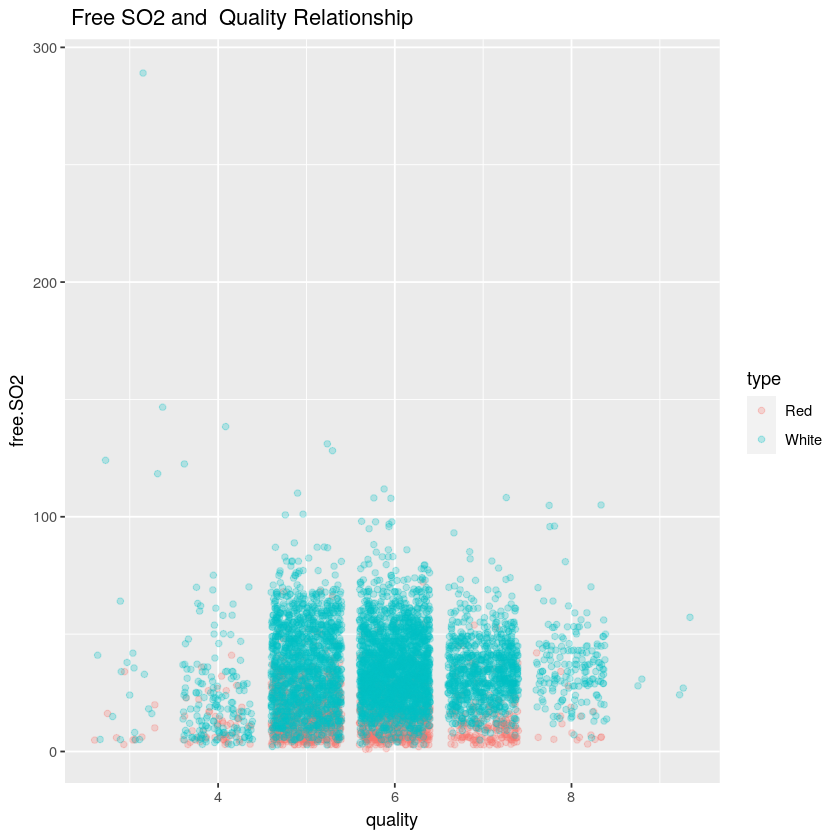

In [30]:
ggplot(aes(x = quality, y = free.SO2), data = wine) + 
    geom_point(aes(color=type),alpha=1/4, position = 'jitter') +
    ggtitle(' Free SO2 and  Quality Relationship')


This indicates for the same quality ratings, white wine has higher free SO2 than the read wine on average across all
the quality ratings.

Then, we analyze the Total SO2.

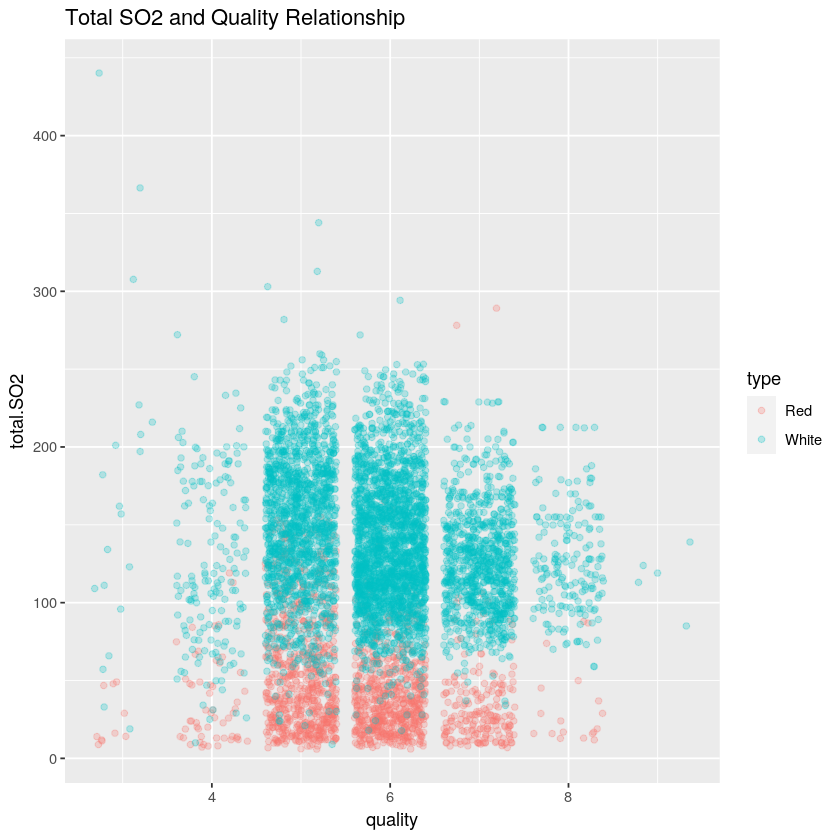

In [31]:
ggplot(aes(x = quality, y = total.SO2), data = wine) + 
    geom_point(aes(color=type),alpha=1/4, position = 'jitter') +
    ggtitle('Total SO2 and Quality Relationship')

The analysis plot indicates again the existence of higher total SO2 in the White wine samples as compared to Red wine.

The relationship of the Total SO2 with sulpahtes and residual sugar is analysed below:

Warning message:
“Ignoring unknown parameters: fun.y”
Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



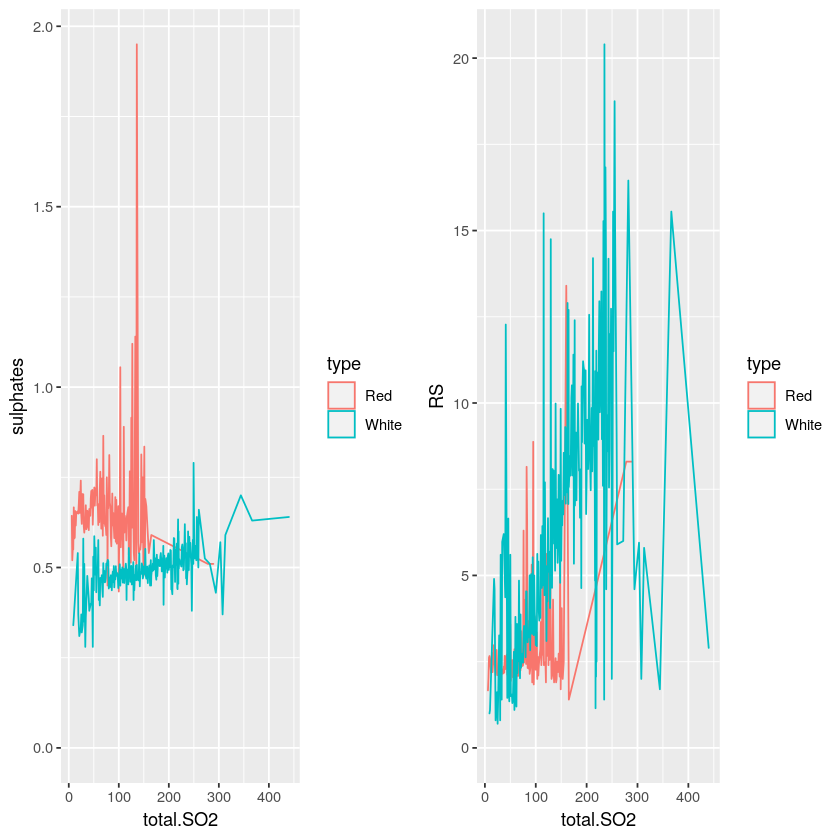

In [32]:
b1<-ggplot(aes(x=total.SO2,y=sulphates), data = wine) +
    geom_density(aes(color=type),stat='summary',fun.y=median)
  
b2<-ggplot(aes(x=total.SO2,y=RS), data = wine) +
    geom_density(aes(color=type),stat='summary',fun.y=median)

grid.arrange(b1,b2,ncol=2)

The observations from the above analysis is provided below:

* Sulphate:

The sulphate level is higher for the red wine as compared to white wine, with a huge spike around 150.

For the total SO2 level around 250, the sulphates level of white wine is higher that that of red wine.

White wine have a total SO2 level higher than 280 units.

* Residual Sugar

White wine exhibits a high level of Residual sugar around 250 as compared to Red wine, and in general the quantity of Residual sugar seems to increase as total.SO2 increases. The two lines a lot.

The relationships between free.SO2 and Sulphate/Residual Sugar are analyzed as below:

Warning message:
“Ignoring unknown parameters: fun.y”
Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



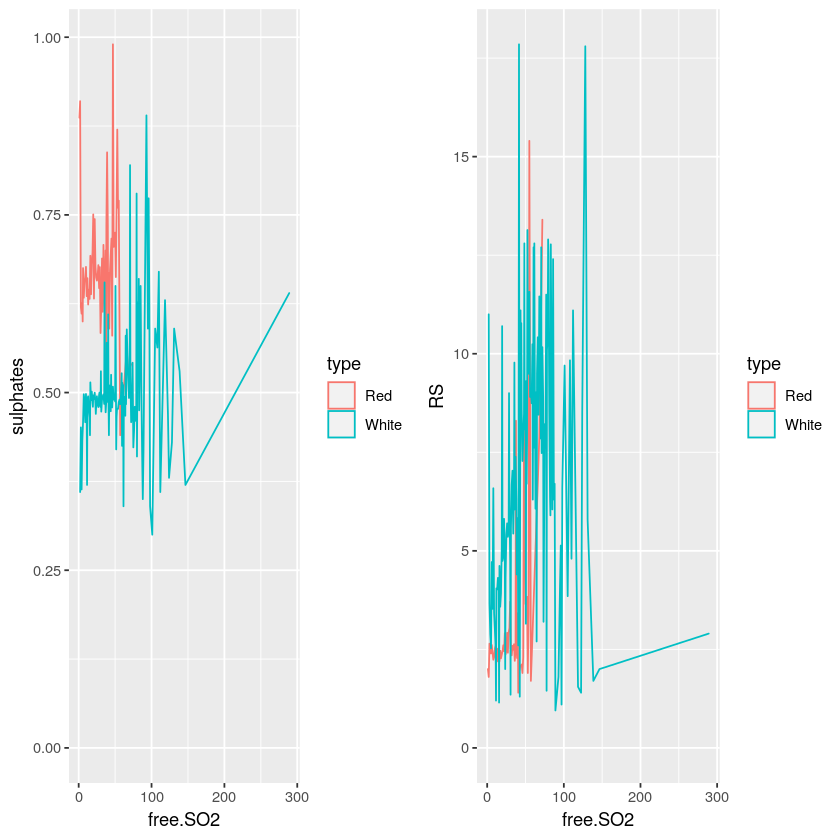

In [33]:
c1<-ggplot(aes(x=free.SO2,y=sulphates), data = wine) +
    geom_density(aes(color=type),stat='summary',fun.y=median)
 
c2<-ggplot(aes(x=free.SO2,y=RS), data = wine) +
    geom_density(aes(color=type),stat='summary',fun.y=median)

grid.arrange(c1,c2,ncol=2)

Similarly, one can conclude that

* Sulphate level is quite high for the red wine as compared to white wine.
Red wine does not exhibit a Free SO2 level beyond 70 units

* Residual Sugar:
white wine exhibits a higher level of residual sugar and has peaks around 150.

A final comparison is done between the Red and White wine to understand the difference between the two variants 
for the parameter of Total and Free SO2 and the PH values.

Warning message:
“Ignoring unknown parameters: fun.y”
Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`



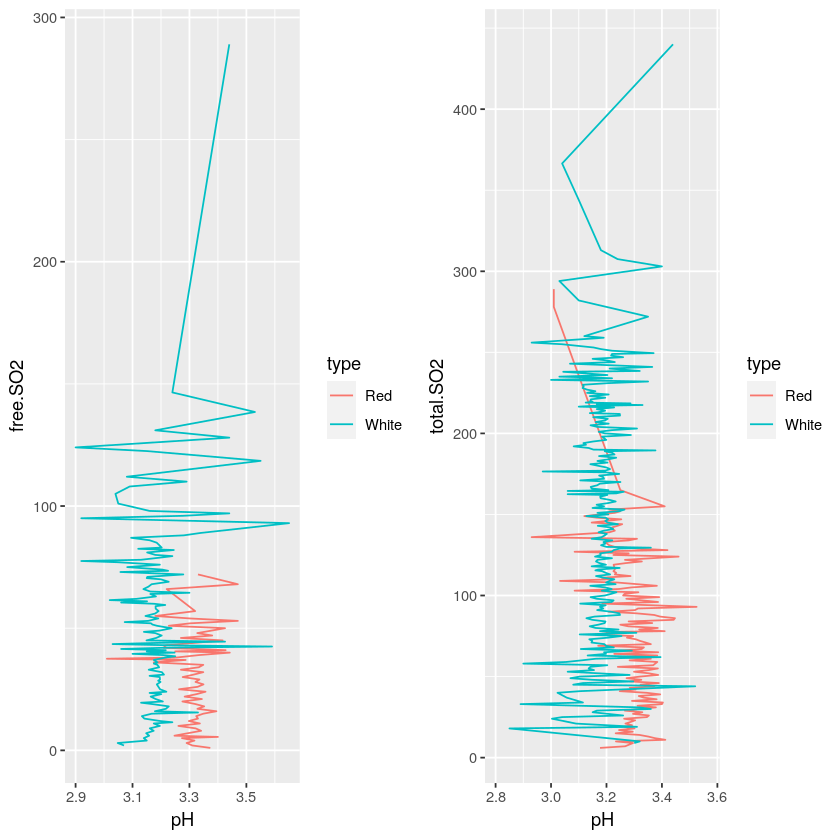

In [40]:
s1<-ggplot(aes(x=pH,y=free.SO2), data = wine) +
    geom_line(aes(color=type),stat='summary',fun.y=median)

s2<-ggplot(aes(x=pH,y=total.SO2), data = wine) +
    geom_line(aes(color=type),stat='summary',fun.y=median)

grid.arrange(s1,s2,ncol=2)

The above plot indicates that white wine does exhibit higher SO2 components as compared to Red Wine for 
similar pH values across all pH values within the sample.
There seems to be a higher variation for both SO2 values in 
both Red and White wines between a pH value of 3.5 and 4.0. 
A closer look at these pH interval is given below

Warning message:
“Ignoring unknown parameters: fun.y”
Warning message:
“Ignoring unknown parameters: fun.y”
Warning message:
“Removed 6161 rows containing non-finite values (stat_summary).”
No summary function supplied, defaulting to `mean_se()`

Warning message:
“Removed 6161 rows containing non-finite values (stat_summary).”
No summary function supplied, defaulting to `mean_se()`



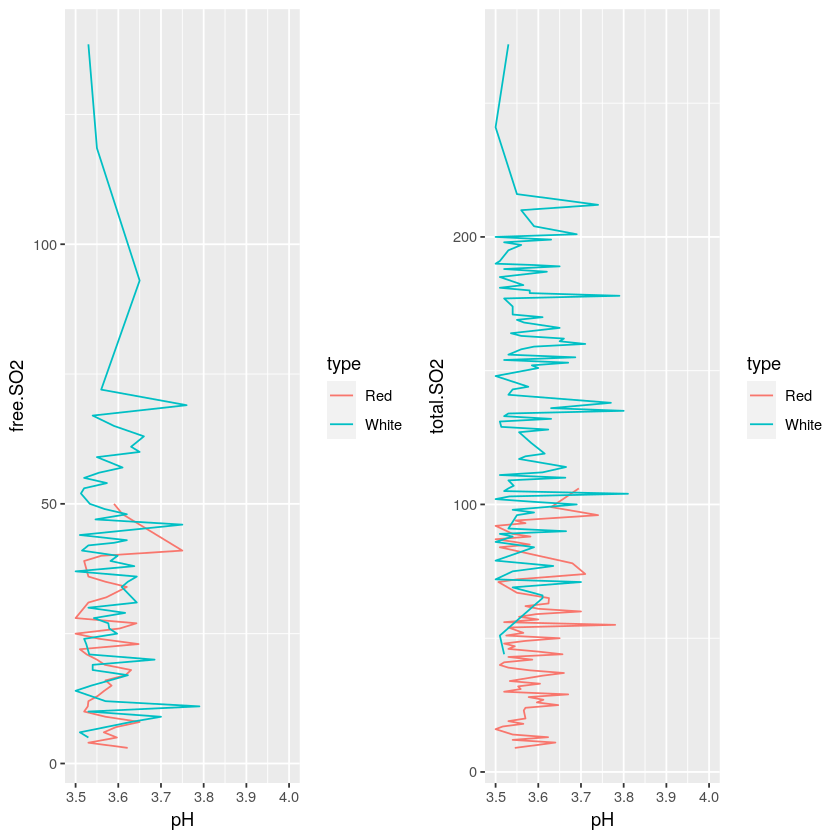

In [41]:
t1<-ggplot(aes(x=pH,y=free.SO2), data = wine) +
    geom_line(aes(color=type),stat='summary',fun.y=median) +
    xlim(3.5,4.0)

t2<-ggplot(aes(x=pH,y=total.SO2), data = wine) +
    geom_line(aes(color=type),stat='summary',fun.y=median) +
    xlim(3.5,4.0)

grid.arrange(t1,t2,ncol=2)

The above plots indicate a high peak for free SO2 (60 units) for a pH value of 3.65 while a high peak for 
red wine for a pH value of 3.75 (41 units). In the case of Total SO2, the peak of around 180 units for white at a pH level 
around 3.62 while Red wine exhibits a peak of around 105 units at a pH level of 3.85. Also, it is observed that only 
red wine has a pH value beyond 3.85 and the Total and Free SO2 levels at this level is low.

Warning message:
“Ignoring unknown parameters: fun.y”
No summary function supplied, defaulting to `mean_se()`



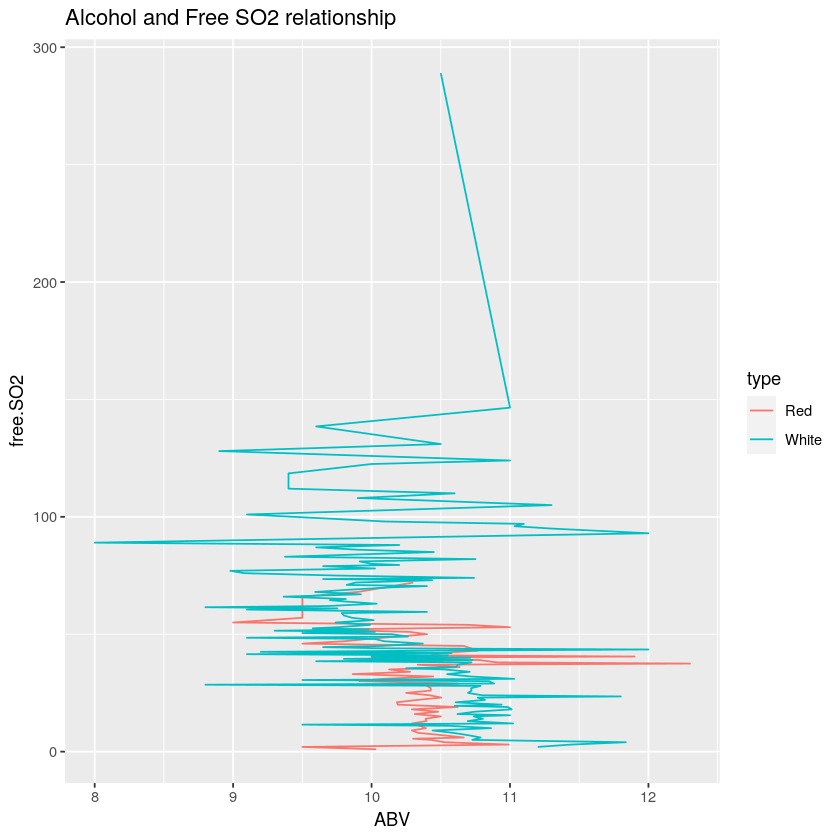

In [42]:
ggplot(aes(x=ABV,y=free.SO2), data = wine) +
    geom_line(aes(color=type),stat='summary',fun.y=median) +
    ggtitle('Alcohol and Free SO2 relationship')

The above plot indicates that for the same alcohol content, free.SO2 is higher in white wine than 
red wine and also the free SO2 decreases quite significantly with the alcohol content increases.

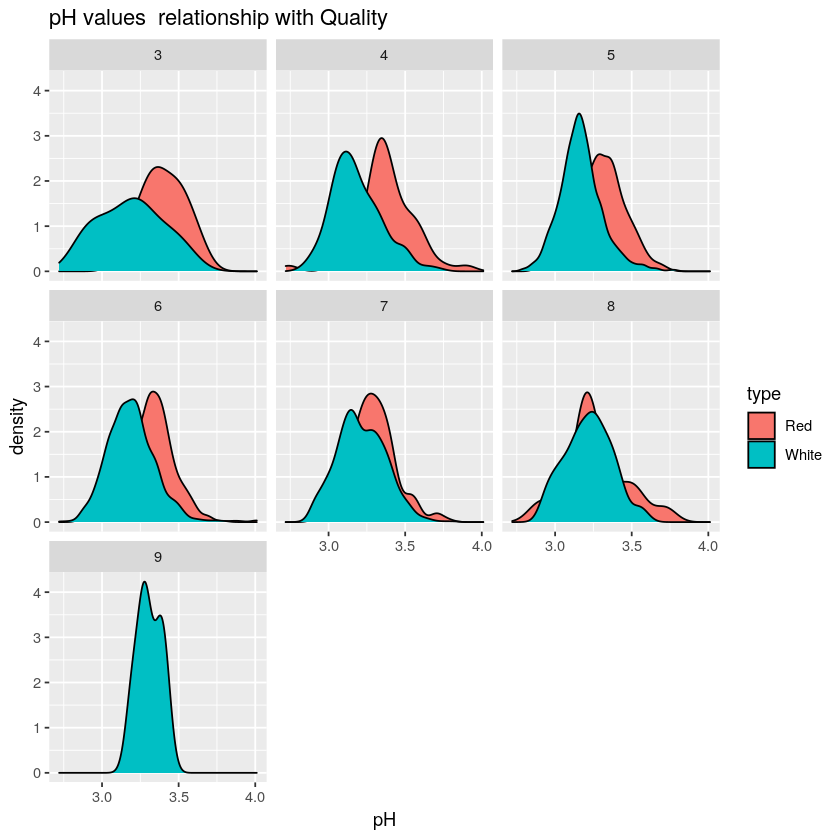

In [43]:
ggplot(aes(x = pH),data = wine) + 
    geom_density(aes(fill = type)) +
    facet_wrap(~quality) +
    ggtitle('pH values  relationship with Quality')

From the above analysis plot, there doesn't seem to be any specific relations between pH values and quality in terms of the spread. However the Red wine tends to exhibit a higher pH value density than white wine for quality rating till 7 while quality rating of 8 has more similar values of density. The quality rating of 9 exhibits a more narrower spread for pH value between 3.1 and 3.6.


## Summary

pH value is considered an important parameter when determining the quality of the Wine.The analysis over the samples however indicate that there is no specific values of pH which provides bias for quality ratings and a higher density of Red Wine samples did indicate a higher PH values as compared to White wine samples for the same quality ratings.These pH value however was found to be optimum between a value of 3.0 and 3.5. A pH value of higher than 3.5 tends to exhibit a higher SO2 values which can be concern for people with concerns of health issues with SO2. Samples with higher alcohol content did exhibit lower SO2 counts and also White wine samples exhibited a higher level of SO2 components as compared to Red wine for the same level of Alcohol.

Some of the learnings from the analysis were as follows:

* The understanding that Red Wine generally exhibits more SO2 properties than White wine seems to be not true as per the samples considered.The analysis proves that White wine exhibit a higher level of SO2 properties
* It always seemed that pH value was a key factor in determining the quality of the wines but from the analysis ,it seems that pH value do not exhibit any patterns which can be utilized as a key deterministic variable for wine quality testing by sensory analysis.
* From the samples analyzed,the wines with higher Alcohol content exhibited lower SO2 content as compared with samples with lower Alcohol content. 4.For the buyer conscious of the sugar content in the wines,White wine exhibits more residual sugar and at we have seen spikes in the residual sugar for certain ranges of the Free and Total SO2 primarily with White wine.

A limitation of the current analysis is that the current data consists of samples collected from a specific portugal region.It will be interesting to obtain datasets across various wine making regions to eliminate any bias created by any specific qualities of the product,



## Reference

* http://rstudio-pubs-static.s3.amazonaws.com/24803_abbae17a5e154b259f6f9225da6dade0.html
* https://rpubs.com/Bilal_Mahmood/EDA